In [1]:
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np  

In [2]:
# thresholding func
def applyCLAHE(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl_image = clahe.apply(image)

    return cl_image

In [3]:
# main block
image_directory = './image'
save_directory = './cl_image'
for img_name in os.listdir(image_directory):
    image_path = os.path.join(image_directory, img_name)
    image = cv2.imread(image_path, 0) # open image and convert to grayscale
    
    # resizing
    image = cv2.resize(image, (224, 224))

    # applying clahe
    cl_image = applyCLAHE(image)

    # saving to cl_image dir
    save_path = os.path.join(save_directory, img_name)
    cv2.imwrite(save_path, cl_image)

In [3]:
# main block for healthy eyes
image_directory2 = './Normal Eye_Dataset'
save_directory2 = './cl_image_healthy'

for img_name in os.listdir(image_directory2):
    image_path = os.path.join(image_directory2, img_name)
    image = cv2.imread(image_path, 0) # open image and convert to grayscale
    
    # resizing
    image = cv2.resize(image, (224, 224))

    # applying clahe
    cl_image = applyCLAHE(image)

    # saving to cl_image dir
    save_path = os.path.join(save_directory2, img_name)
    cv2.imwrite(save_path, cl_image)

In [ ]:
# getting mean pixel intensity distribution 
folder = "./cl_image"
means = []

for img_name in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, img_name), 0)  # grayscale
    means.append(img.mean())

print("Dataset average:", np.mean(means))
print("Std dev:", np.std(means))

Dataset average: 71.80628318664533
Std dev: 19.291240681339225


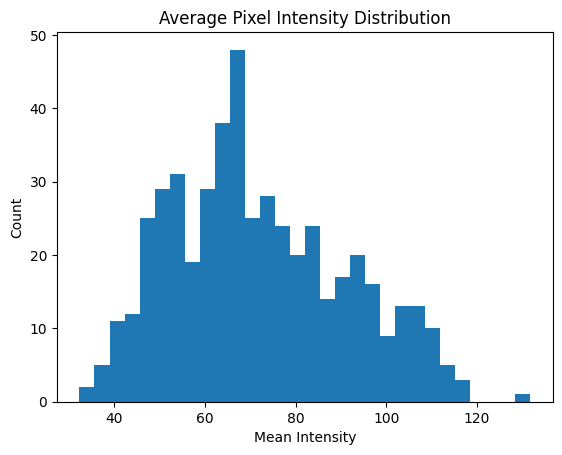

In [ ]:
plt.hist(means, bins=30)
plt.title("Average Pixel Intensity Distribution")
plt.xlabel("Mean Intensity")
plt.ylabel("Count")
plt.show()